# Iris Dataset - Clustering Task (K-Means)

# Import Libraries

In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [ ]:
# mounts gdrive to the colab environment to access files stored in your drive
drive.mount('/content/drive')

Mounted at /content/drive


# Load Dataset

In [ ]:
# path to csv file in gdrive
iris_path = '/content/drive/MyDrive/Data Science task List/Data Set For Task/1) iris.csv'

# read csv from path into pandas dataframe
df = pd.read_csv(iris_path)
df.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# Data Understanding

In [ ]:
# Info struktur data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
# Statistik dasar
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
# Cek missing values
df.isnull().sum()

,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
species,0


In [ ]:
# Cek duplikasi
df.duplicated().sum()

np.int64(3)

In [ ]:
# Distribusi label
df['species'].value_counts()

,count
species,
setosa,50
versicolor,50
virginica,50


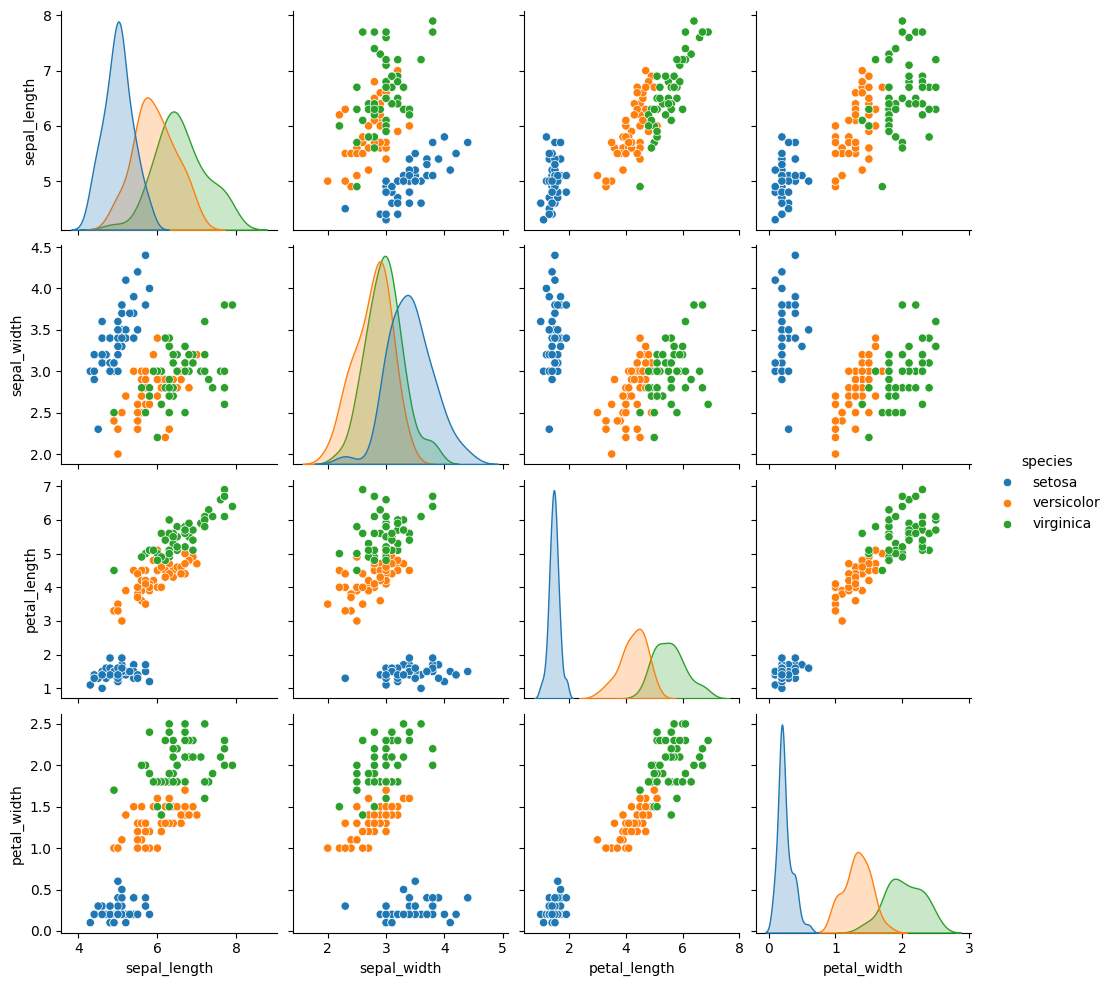

In [ ]:
# Pairplot
sns.pairplot(df, hue='species')
plt.show()

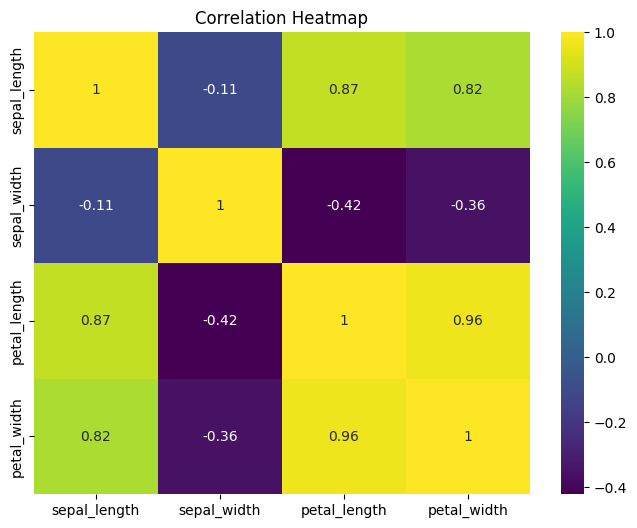

In [ ]:
# Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df.drop(columns=['species']).corr(), annot=True, cmap='viridis')
plt.title('Correlation Heatmap')
plt.show()

#Preprocessing

In [ ]:
X = df.drop(columns=['species'])
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


# Elbow Method

In [ ]:
inertia_values = []
K_range = range(1, 10)

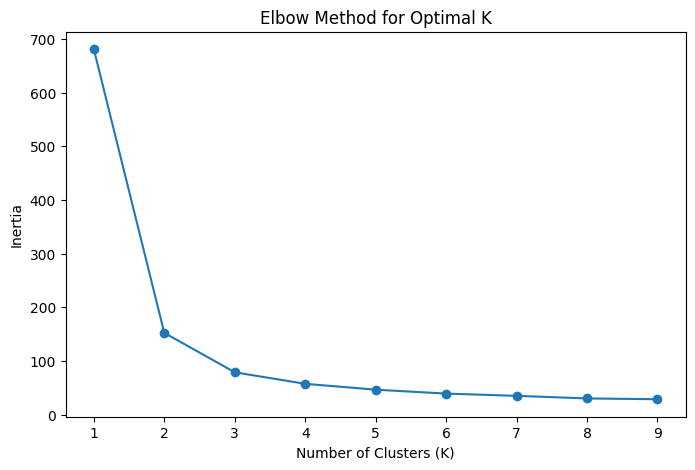

In [ ]:
for k in K_range:
  kmeans = KMeans(n_clusters=k, random_state=42)
  kmeans.fit(X)
  inertia_values.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K_range, inertia_values, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.show()

# Silhouette Score


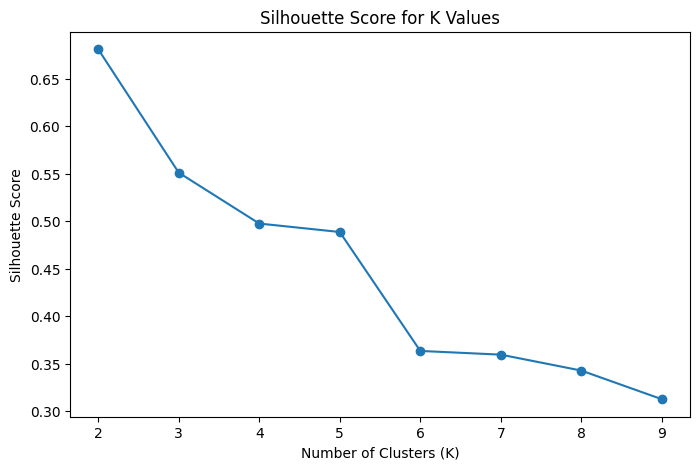

In [ ]:
sil_scores = []

for k in range(2, 10):
  kmeans = KMeans(n_clusters=k, random_state=42)
  labels = kmeans.fit_predict(X)
  sil_scores.append(silhouette_score(X, labels))

plt.figure(figsize=(8,5))
plt.plot(range(2,10), sil_scores, marker='o')
plt.title('Silhouette Score for K Values')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.show()

# Modeling

In [ ]:
kmeans_final = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans_final.fit_predict(X)

df['cluster'] = cluster_labels
df

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,0
146,6.3,2.5,5.0,1.9,virginica,2
147,6.5,3.0,5.2,2.0,virginica,0
148,6.2,3.4,5.4,2.3,virginica,0


# PCA Visualization (2D)

In [ ]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X)

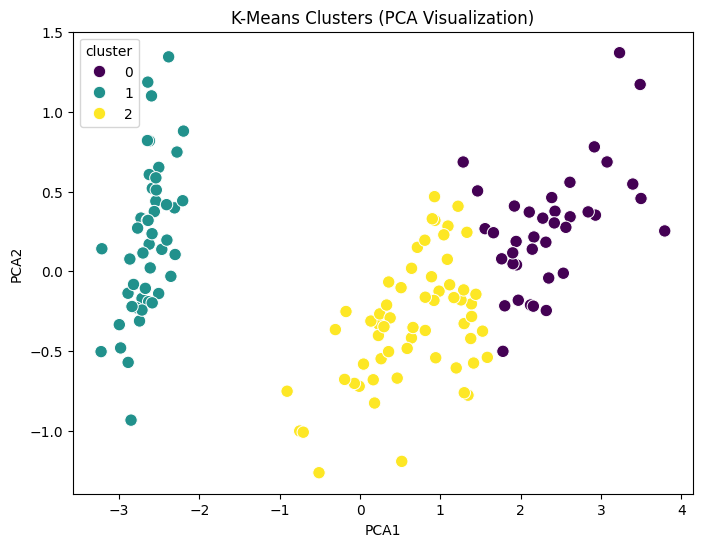

In [ ]:
df['PCA1'] = pca_result[:,0]
df['PCA2'] = pca_result[:,1]

plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='cluster', palette='viridis', s=80)
plt.title('K-Means Clusters (PCA Visualization)')
plt.show()

In [ ]:
# Perbandingan dengan spesies asli
pd.crosstab(df['species'], df['cluster'])

cluster,0,1,2
species,,,
setosa,0,50,0
versicolor,3,0,47
virginica,36,0,14
